In [1]:
!git clone https://github.com/kishkath/CIFAR10-OCP.git

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Cloning into 'CIFAR10-OCP'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 53 (delta 24), reused 13 (delta 0), pack-reused 0
Unpacking objects: 100% (53/53), 16.46 KiB | 887.00 KiB/s, done.


In [2]:
!pip install torchsummary
!pip install pytorch-gradcam
!pip install torch_lr_finder

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 44.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-py3-none-any.whl size=5269 sha256=94e4a485cbb05bb271a4f022c653f17c70c81d97917562c23913b6e927f88e45
  Stored in directory: /root/.cache/pip/wheels/06/e7/da/b13a71980c3a787414e5ff8e156701c561c6322636396d71cc
Successfully built pytorch-gradcam
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [3]:
import sys
sys.path.append("/kaggle/working/CIFAR10-OCP/")

In [4]:
from copy import deepcopy
from main import scores 

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from colorama import Fore,Style
import matplotlib.pyplot as plt
# python pip Libraries
from torch_lr_finder import LRFinder

from models import * 
from main import Performance,scores
from torchsummary import summary
from utils import mis_prediction,plotting_gradCams,loader,class_accuracy,Plot_curves,Draw
# user defined libraries:

==> Preparing data..
==> Getting model..
==> Its Training!


In [21]:
from models import *

In [22]:
model = Custom_resnet().to("cuda")

In [23]:
model1 = deepcopy(model)
model2 = deepcopy(model)
model3 = deepcopy(model)
model4 = deepcopy(model)
model5 = deepcopy(model)

In [8]:
# !pip install torchsummary
summary(model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

# 

In [9]:
trainloader,testloader = loader.load_data(512)

/opt/conda/lib/python3.7/site-packages/albumentations/augmentations/dropout/cutout.py:51: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  FutureWarning,


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [10]:
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Plotting 10 test images!
0.cat 1.ship 2.ship 3.plane 4.frog 5.frog 6.car 7.frog 8.cat 9.car 10.plane


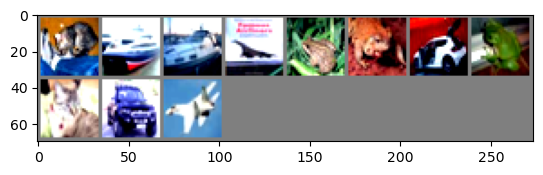

In [11]:
plot_num_images = 11
print(Style.BRIGHT+Fore.GREEN+f"Plotting {plot_num_images-1} test images!")
dataiter = next(iter(testloader))
image_set , labels = dataiter
print(' '.join(str(j)+"."+'%1s' % classes[labels[j]] for j in range(plot_num_images)))
Draw.plotings(torchvision.utils.make_grid(image_set[:plot_num_images]))

Plotting Train Images!
frog cat truck car car bird deer plane cat horse horse


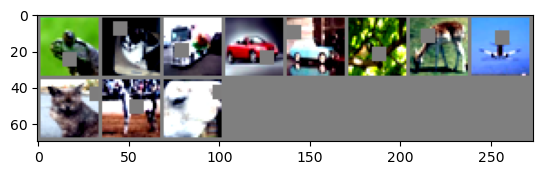

In [12]:
print(Style.BRIGHT+Fore.YELLOW+'Plotting Train Images!')
# get some random training images
dataiter = next(iter(trainloader))
image_set , labels = dataiter
print(' '.join('%1s' % classes[labels[j]] for j in range(plot_num_images)))
Draw.plotings(torchvision.utils.make_grid(image_set[:plot_num_images]))

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.68E-02


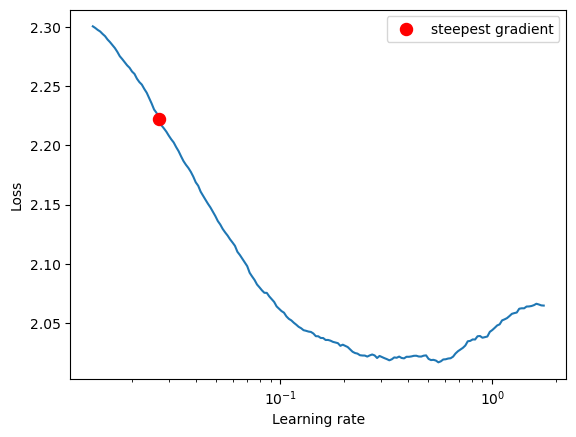

0.5571956088202665


In [13]:
## Finding optimal learning_rate
from torch_lr_finder import LRFinder
import numpy as np
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01,momentum=0.9)

# Instantiate the LRFinder object
lr_finder = LRFinder(model2, optimizer,criterion,device="cuda")

# Run the range test
lr_finder.range_test(trainloader, end_lr=2, num_iter=200,step_mode='exp')

# Plot the learning rate versus loss curve
lr_finder.plot()

min_loss = min(lr_finder.history['loss'])
max_loss = min(lr_finder.history['loss'])
# Identify the optimal learning rate
ler_rate = lr_finder.history['lr'][np.argmin(lr_finder.history['loss'], axis=0)]
print(ler_rate)

In [14]:
print(lr_finder)
print(min(lr_finder.history['lr']))

0.01


In [15]:
lr_finder.reset()

In [16]:
import torch.optim as optim
device = "cuda"
from torch.optim.lr_scheduler import OneCycleLR

optimizer = optim.SGD(model.parameters(),lr=0.05 ,momentum=0.9)
criterion = nn.CrossEntropyLoss()
# Define your learning rate scheduler using the OneCycleLR class
scheduler = OneCycleLR(optimizer,div_factor=10,final_div_factor=100,max_lr=0.3, epochs=24, steps_per_epoch=len(trainloader), pct_start=0.25, anneal_strategy='linear', three_phase=False,cycle_momentum=False)

# Train your neural network using the one-cycle learning rate policy
for epoch in range(24):
    print("EPOCH:", epoch)
    for p in optimizer.param_groups:
        print("Current Learning Rate: ",p["lr"])
    Performance().train(model,device, trainloader, optimizer, epoch,criterion,[False,0.001],scheduler=scheduler)
    for p in optimizer.param_groups:
        print("updated Learning Rate: ",p["lr"])
    Performance().test(model,device, testloader,epoch,criterion)
    

EPOCH: 0
Current Learning Rate:  0.03


Loss=2.0044612884521484 Batch_id=97 train-Accuracy=36.96: 100%|██████████| 98/98 [00:21<00:00,  4.57it/s]


updated Learning Rate:  0.07507666098807496

Test set: Average loss: 0.0040, val-Accuracy: 4563/10000 (45.63%)

Saving..
EPOCH: 1
Current Learning Rate:  0.07507666098807496


Loss=1.8259773254394531 Batch_id=97 train-Accuracy=56.19: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]


updated Learning Rate:  0.12015332197614992

Test set: Average loss: 0.0038, val-Accuracy: 5657/10000 (56.57%)

Saving..
EPOCH: 2
Current Learning Rate:  0.12015332197614992


Loss=1.73370361328125 Batch_id=97 train-Accuracy=65.65: 100%|██████████| 98/98 [00:21<00:00,  4.53it/s]  


updated Learning Rate:  0.16522998296422486

Test set: Average loss: 0.0037, val-Accuracy: 6167/10000 (61.67%)

Saving..
EPOCH: 3
Current Learning Rate:  0.16522998296422486


Loss=1.7246304750442505 Batch_id=97 train-Accuracy=70.28: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]


updated Learning Rate:  0.21030664395229984

Test set: Average loss: 0.0036, val-Accuracy: 6786/10000 (67.86%)

Saving..
EPOCH: 4
Current Learning Rate:  0.21030664395229984


Loss=1.719595193862915 Batch_id=97 train-Accuracy=73.30: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s] 


updated Learning Rate:  0.25538330494037476

Test set: Average loss: 0.0035, val-Accuracy: 6925/10000 (69.25%)

Saving..
EPOCH: 5
Current Learning Rate:  0.25538330494037476


Loss=1.693541169166565 Batch_id=97 train-Accuracy=75.14: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s] 


updated Learning Rate:  0.29983010204081634

Test set: Average loss: 0.0035, val-Accuracy: 7108/10000 (71.08%)

Saving..
EPOCH: 6
Current Learning Rate:  0.29983010204081634


Loss=1.683409333229065 Batch_id=97 train-Accuracy=76.68: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s] 


updated Learning Rate:  0.28318010204081634

Test set: Average loss: 0.0035, val-Accuracy: 7083/10000 (70.83%)

EPOCH: 7
Current Learning Rate:  0.28318010204081634


Loss=1.6645395755767822 Batch_id=97 train-Accuracy=78.92: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]


updated Learning Rate:  0.26653010204081634

Test set: Average loss: 0.0035, val-Accuracy: 7105/10000 (71.05%)

EPOCH: 8
Current Learning Rate:  0.26653010204081634


Loss=1.6482816934585571 Batch_id=97 train-Accuracy=81.31: 100%|██████████| 98/98 [00:21<00:00,  4.51it/s]


updated Learning Rate:  0.24988010204081632

Test set: Average loss: 0.0034, val-Accuracy: 7837/10000 (78.37%)

Saving..
EPOCH: 9
Current Learning Rate:  0.24988010204081632


Loss=1.6468431949615479 Batch_id=97 train-Accuracy=82.75: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]


updated Learning Rate:  0.23323010204081632

Test set: Average loss: 0.0033, val-Accuracy: 7971/10000 (79.71%)

Saving..
EPOCH: 10
Current Learning Rate:  0.23323010204081632


Loss=1.6355009078979492 Batch_id=97 train-Accuracy=84.02: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


updated Learning Rate:  0.21658010204081635

Test set: Average loss: 0.0034, val-Accuracy: 7711/10000 (77.11%)

EPOCH: 11
Current Learning Rate:  0.21658010204081635


Loss=1.6213057041168213 Batch_id=97 train-Accuracy=84.95: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


updated Learning Rate:  0.19993010204081632

Test set: Average loss: 0.0033, val-Accuracy: 8203/10000 (82.03%)

Saving..
EPOCH: 12
Current Learning Rate:  0.19993010204081632


Loss=1.6298704147338867 Batch_id=97 train-Accuracy=86.09: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


updated Learning Rate:  0.18328010204081635

Test set: Average loss: 0.0033, val-Accuracy: 7875/10000 (78.75%)

EPOCH: 13
Current Learning Rate:  0.18328010204081635


Loss=1.598954677581787 Batch_id=97 train-Accuracy=87.24: 100%|██████████| 98/98 [00:21<00:00,  4.58it/s] 


updated Learning Rate:  0.16663010204081632

Test set: Average loss: 0.0032, val-Accuracy: 8408/10000 (84.08%)

Saving..
EPOCH: 14
Current Learning Rate:  0.16663010204081632


Loss=1.5493147373199463 Batch_id=97 train-Accuracy=88.22: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]


updated Learning Rate:  0.14998010204081633

Test set: Average loss: 0.0033, val-Accuracy: 8317/10000 (83.17%)

EPOCH: 15
Current Learning Rate:  0.14998010204081633


Loss=1.563116192817688 Batch_id=97 train-Accuracy=88.95: 100%|██████████| 98/98 [00:21<00:00,  4.53it/s] 


updated Learning Rate:  0.13333010204081633

Test set: Average loss: 0.0032, val-Accuracy: 8387/10000 (83.87%)

EPOCH: 16
Current Learning Rate:  0.13333010204081633


Loss=1.5666364431381226 Batch_id=97 train-Accuracy=89.75: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


updated Learning Rate:  0.11668010204081633

Test set: Average loss: 0.0032, val-Accuracy: 8545/10000 (85.45%)

Saving..
EPOCH: 17
Current Learning Rate:  0.11668010204081633


Loss=1.5567312240600586 Batch_id=97 train-Accuracy=90.51: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]


updated Learning Rate:  0.10003010204081636

Test set: Average loss: 0.0032, val-Accuracy: 8648/10000 (86.48%)

Saving..
EPOCH: 18
Current Learning Rate:  0.10003010204081636


Loss=1.5637166500091553 Batch_id=97 train-Accuracy=91.21: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]


updated Learning Rate:  0.08338010204081636

Test set: Average loss: 0.0032, val-Accuracy: 8575/10000 (85.75%)

EPOCH: 19
Current Learning Rate:  0.08338010204081636


Loss=1.528098702430725 Batch_id=97 train-Accuracy=91.80: 100%|██████████| 98/98 [00:21<00:00,  4.58it/s] 


updated Learning Rate:  0.06673010204081634

Test set: Average loss: 0.0032, val-Accuracy: 8737/10000 (87.37%)

Saving..
EPOCH: 20
Current Learning Rate:  0.06673010204081634


Loss=1.5395063161849976 Batch_id=97 train-Accuracy=92.43: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]


updated Learning Rate:  0.05008010204081634

Test set: Average loss: 0.0032, val-Accuracy: 8791/10000 (87.91%)

Saving..
EPOCH: 21
Current Learning Rate:  0.05008010204081634


Loss=1.5246474742889404 Batch_id=97 train-Accuracy=92.87: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]


updated Learning Rate:  0.03343010204081631

Test set: Average loss: 0.0032, val-Accuracy: 8800/10000 (88.00%)

Saving..
EPOCH: 22
Current Learning Rate:  0.03343010204081631


Loss=1.5372095108032227 Batch_id=97 train-Accuracy=93.26: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


updated Learning Rate:  0.01678010204081637

Test set: Average loss: 0.0032, val-Accuracy: 8837/10000 (88.37%)

Saving..
EPOCH: 23
Current Learning Rate:  0.01678010204081637


Loss=1.5123331546783447 Batch_id=97 train-Accuracy=93.73: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]


updated Learning Rate:  0.0001301020408163156

Test set: Average loss: 0.0032, val-Accuracy: 8857/10000 (88.57%)

Saving..


array([[<AxesSubplot:title={'center':'Training Loss'}>,
        <AxesSubplot:title={'center':'Test Loss'}>],
       [<AxesSubplot:title={'center':'Training Accuracy'}>,
        <AxesSubplot:title={'center':'Test Accuracy'}>]], dtype=object)

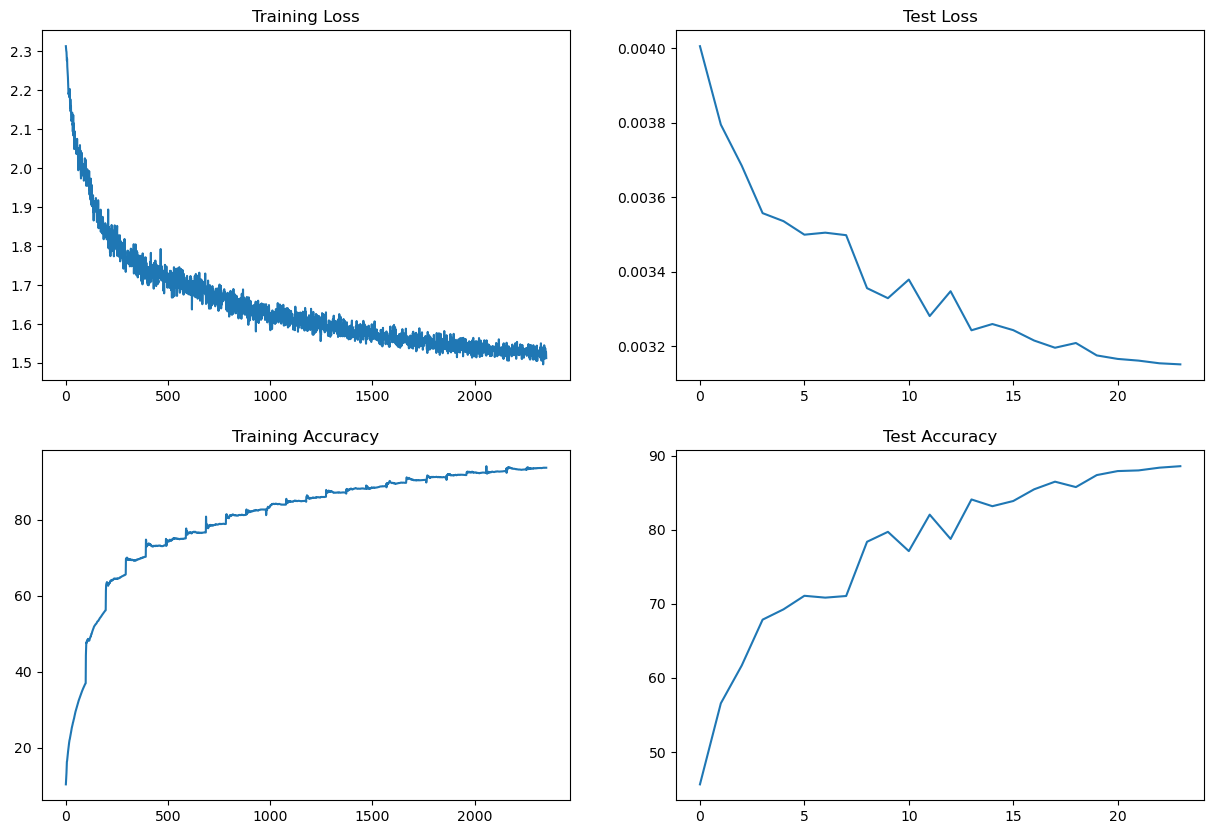

In [17]:
## Performance scores
train_acc,train_losses,test_acc,test_losses = scores()
Plot_curves().performance_curves(train_acc,test_acc,train_losses,test_losses)

                              MISCLASSIFIED IMAGES                              




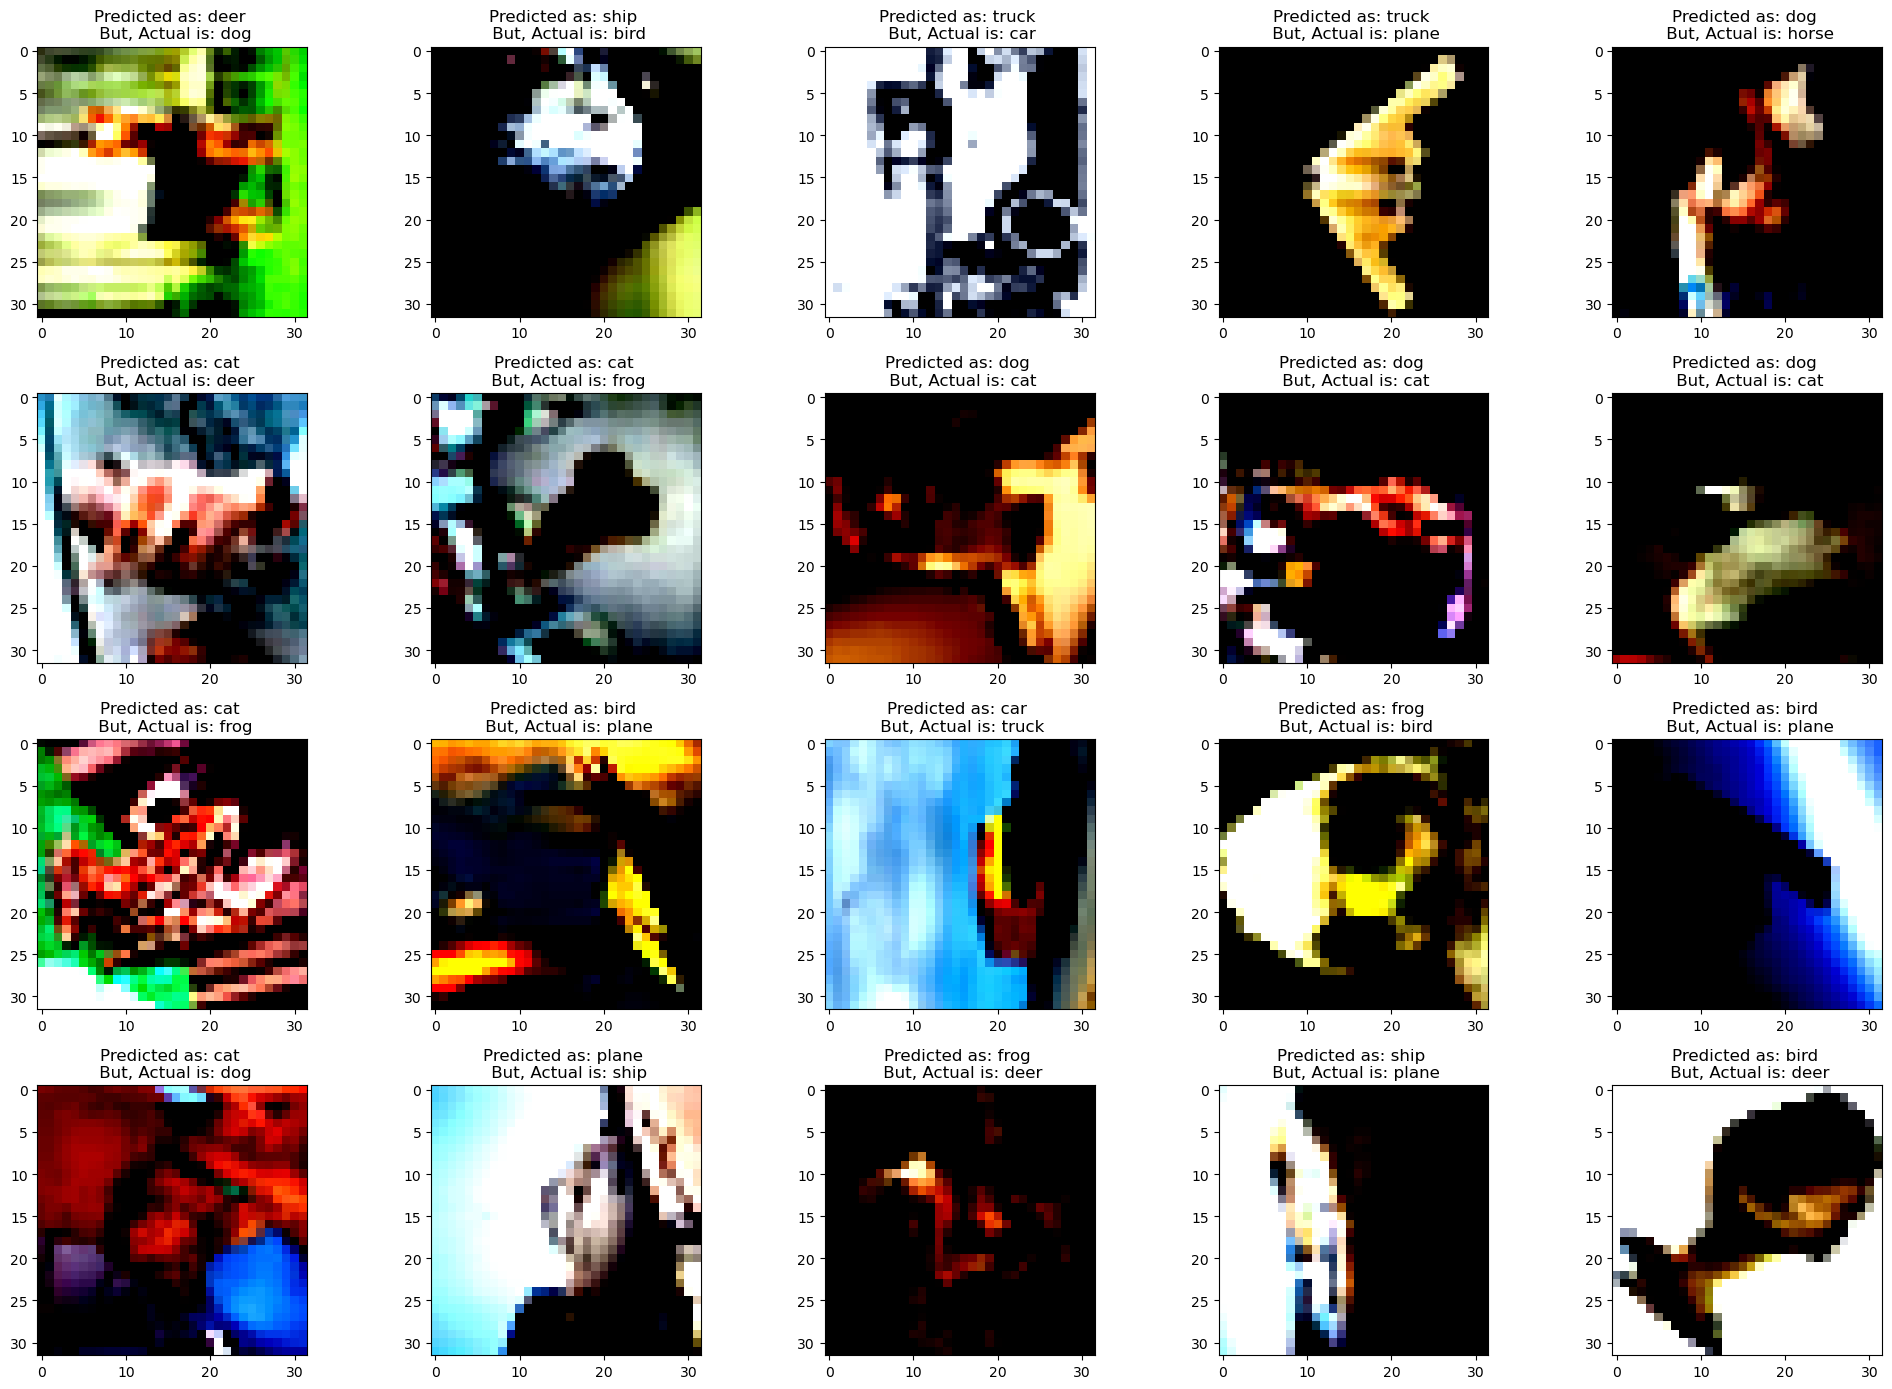

In [18]:
print(" "*30+Style.BRIGHT+Fore.BLACK+"MISCLASSIFIED IMAGES"+" "*30)
print("\n")
# If you want n number of images to plot just pass the number as third parameter:
# like: mis_classsified(model,testloader,7,default is 10
Plot_curves.mis_classified(model,testloader,20)

                    GRAD-CAM usable diagnosistic IMAGES                    
Diagnosis is happening for Layer2 of ResNet18. Lets go!


/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:3722: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


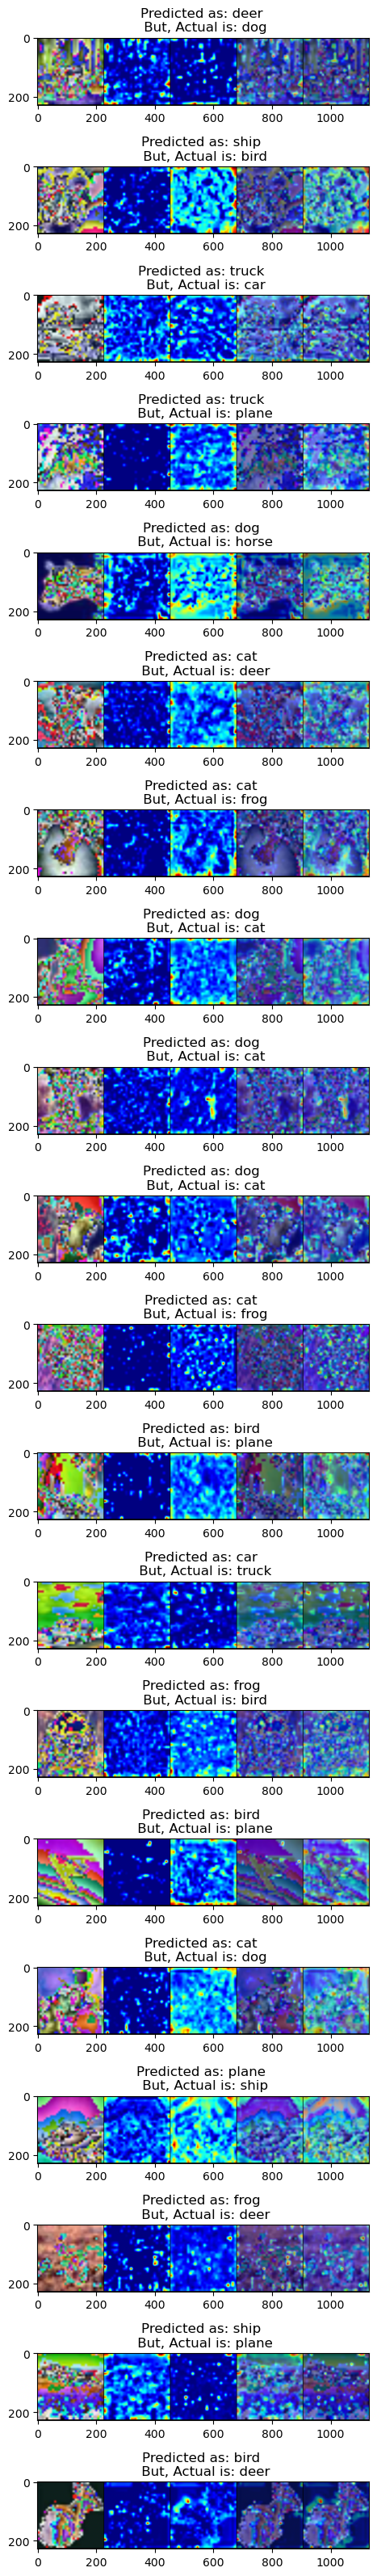

In [19]:
## Can plots any number of images less than stored mis-classifed Images
print(" "*20+Style.BRIGHT+Fore.BLACK+"GRAD-CAM usable diagnosistic IMAGES"+" "*20)
plotting_gradCams(20)

In [20]:

classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_accuracies = class_accuracy.rate(testloader,model,classes)
for label,acc in class_accuracies.items():
  print(label,":",round(acc,2))

plane : 85.71
car : 100.0
bird : 85.71
cat : 58.33
deer : 100.0
dog : 66.67
frog : 81.82
horse : 83.33
ship : 91.67
truck : 100.0
